In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

DATA_DIR = './data'

classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Using device: cuda


In [ ]:
transform_train = transforms.Compose([
    transforms.Resize(224),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize(224),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
train_dataset = torchvision.datasets.FashionMNIST(root=DATA_DIR, train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.FashionMNIST(root=DATA_DIR, train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
from torchvision.models import resnet18, ResNet18_Weights

model = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

model.fc = nn.Linear(model.fc.in_features, 10)

model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

num_epochs = 10

In [ ]:
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)
    print(f"Accuracy on test set: {accuracy:.2f}%")

Epoch [1/10], Loss: 0.2985
Accuracy on test set: 92.58%
Epoch [2/10], Loss: 0.1841
Accuracy on test set: 93.56%
Epoch [3/10], Loss: 0.1507
Accuracy on test set: 93.05%
Epoch [4/10], Loss: 0.1320
Accuracy on test set: 93.50%
Epoch [5/10], Loss: 0.1123
Accuracy on test set: 93.08%
Epoch [6/10], Loss: 0.1007
Accuracy on test set: 92.30%
Epoch [7/10], Loss: 0.0966
Accuracy on test set: 93.63%
Epoch [8/10], Loss: 0.0852
Accuracy on test set: 93.78%
Epoch [9/10], Loss: 0.0754
Accuracy on test set: 93.59%
Epoch [10/10], Loss: 0.0712
Accuracy on test set: 92.87%


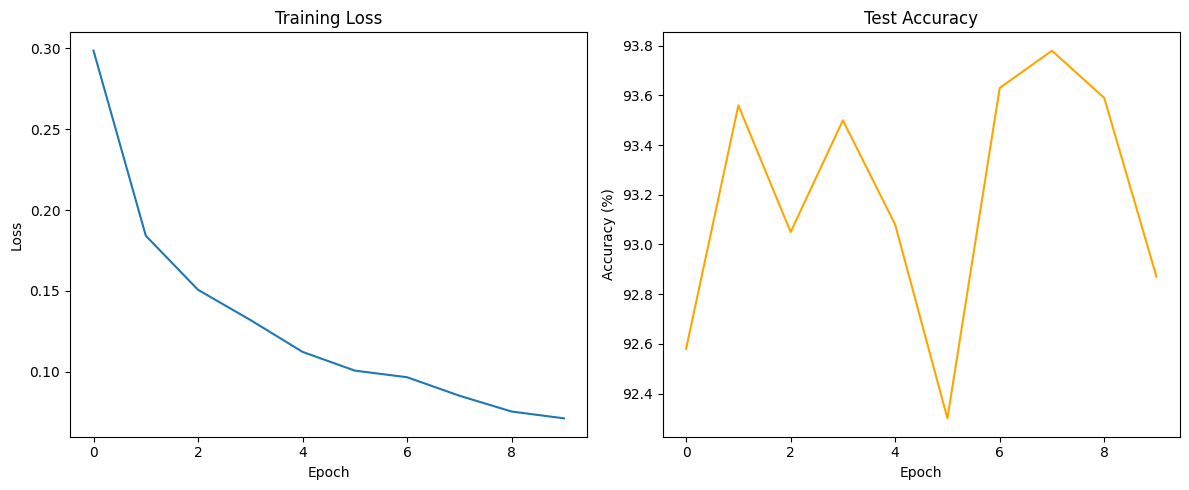

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy', color='orange')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()

In [ ]:
def visualize_predictions(model, test_loader, num_images=5):
    model.eval()
    images, labels = next(iter(test_loader))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    plt.figure(figsize=(15, 6))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f'True: {labels[i].item()}\nPred: {predicted[i].item()}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

visualize_predictions(model, test_loader)